# Definiowanie funkcji

Do tej pory używaliśmy różnych funkcji oraz metod klas Pythona, przykładowo:
* `print('text')`
* `list.append()`
* `list.count(element)`
* `dict.pop(element)`

Do metod przejdziemy przy okazji omawiania OOP, teraz zdefiuniujmy funkcję.
Funkcję definiujemy używając słowa kluczowego `def` nazwy funkcji oraz listy parametrów (może być pusta), po której następuje znak dwukropka `:`

In [2]:
def hello_w():
    print ("Hello world!")
    
def my_func(name):
    print ("Hello " + name)

wywołanie:

In [3]:
hello_w()

Hello world!


In [4]:
my_func()

TypeError: my_func() missing 1 required positional argument: 'name'

Jeśli funkcja przyjmuje parametry, należy je podać w wywołaniu, w powyższym przykładzie brak parametru `name`. Podanie parametru, gdy takiego nie zdefiniowano również skutkuje błędem:

In [5]:
hello_w("Heniek")

TypeError: hello_w() takes 0 positional arguments but 1 was given

# Zwracanie wartości

Funkcja która tylko wyświetla informacje na ekranie jest bezużyteczna, najczęściej funkcje coś przeliczają i zwracają wynik. Aby zwrócić wynik należy użyć słowa kluczowego `return`:



In [6]:
def format_person(first_name, last_name):
    return {"First name": first_name, "Last name:": last_name}

In [10]:
format_person("Ryszard", "Ochódzki")

{'First name': 'Ryszard', 'Last name:': 'Ochódzki'}

wartość można podstawić do zmiennej

In [9]:
person_dict = format_person("Stanisław", "Paluch")
print(person_dict)

{'First name': 'Stanisław', 'Last name:': 'Paluch'}


# Funkcja `map`

Załóżmy, że chcemy wykonać jakąś funkcję na liście. 
Przyjmijmy, że mamy listę wartości całkowitych i chcemy policzyć wartości `f(x) = 2*x+1`

In [29]:
numbers = [i for i in range(10)]
print(numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
y = []
for x in numbers:
    y.append(2*x+1)

print(y)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


Możemy użyć funkci `map`, która przyjmuje dwa argumenty: funkcję do wykonania i kolekcję: 

`map(my_func, numbers)`

`my_func` musi być zdefiniowana:


In [4]:
def f(x):
    return 2*x+1

y = map(f, numbers)

print(y)

In [6]:
print(list(y))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


# Funkcja `filter`

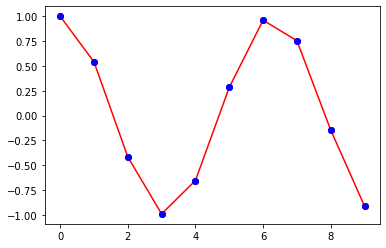

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,10,1) # start, stop, step
y = np.cos(x)

plt.plot(x, y, 'ro-')
plt.show()

In [10]:
from math import cos

y = []
for x in numbers:
    if cos(x) > 0:
        y.append(x)

print(y)

[0, 1, 5, 6, 7]


In [19]:
def cos_gt_zero(x):
    return cos(x) > 0

z = filter(cos_gt_zero, numbers)

print(z)

In [20]:
print(list(z))

[0, 1, 5, 6, 7]


### Różnica w funkcji przekazywanej do map i filter

`map` i `filter` dla każdego elementu kolekcji podanej w parametrze wywołują funkcę podaną w parametrze, natomiast:

* Funkcja przekazywana do `map` *wykonuje operację na danych*, a jej wynik jest wstawiany do wyjściowego obiektu `
map`

* Funkcja przekazywana do `filter` *zwraca wartość logiczną* i jeśli zwróci `True`, wówczas elemeent kolecji źródłowej znajdzie się w kolekcji wynikowej

spróbujmy zamienić funcje przekazywane w parametrze:


In [30]:
z = filter(f, numbers)
print(list(z))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [31]:
for i in numbers:
    print(i, bool(i), bool(2*i+1))

0 False True
1 True True
2 True True
3 True True
4 True True
5 True True
6 True True
7 True True
8 True True
9 True True


In [32]:
y = map(cos_gt_zero, numbers)
print(list(y))

[True, True, False, False, False, True, True, True, False, False]


### Zagnieżdżanie

Często spotyka się sytuację, kiedy trzeba przeliczyć coś na elementach listy, ale tylko tych, które spełniają określone wymagania:

In [34]:
filtered_and_mapped = map(f, filter(cos_gt_zero, numbers))
print(list(filtered_and_mapped))                        

[1, 3, 11, 13, 15]


Zagnieżdzenie map w filter (najpierw 2*x+1, potem filtrujemy):

In [33]:
mapped_and_filtered = filter(cos_gt_zero, map(f, numbers))
print(list(mapped_and_filtered))

[1, 5, 7, 11, 13, 19]


# Lambda

Wyrażenia Lambda pozwalają na tworzenie funkcji "bezimiennych". 
Definiujemy je za pomocą słowa kluczowego `lambda` po którym następuje lista argumentów, dwukropek oraz wyrażenie, które będzie wynikiem:

In [37]:
lambda x: x**2

<function __main__.<lambda>(x)>

Lambda jest uproszczeniem zapisu z pominięciem nazwy funkcji:

```python
def square(x):
    return x**2
```
wrzucamy wszystko do jednej linijki:

```  python
def square(x): return x**2
```
usuwamy nazwę funkcji:
```  python
def x: return x**2
```
usuwamy return:
```  python
def x: x**2
```
zamieniamy def na lambda:
```  python
lambda x: x**2
```

Aby wywołać funkcję "bezimienną" należy wartość wyrażenia lambda podstawić pod zmienną, a następnie użyć zmiennej:

In [38]:
my_lambda_square = lambda x: x**2
my_lambda_square(6)

36

Zdefiniujmy drugą lamdbę, która posłuży nam do filtrowania:

In [43]:
is_even = lambda x: x % 2 == 0

In [44]:
numbers = [i for i in range(10)]
evens_squared = map(my_lambda_square, filter(is_even, numbers))
print(list(evens_squared))

[0, 4, 16, 36, 64]


Można pominąć podstawianie wyrażenia lamdba do zmiennej i zapisać wszysko w jednej linijce:


In [45]:
evens_squared_2 = map(lambda x: x**2, filter(lambda x: x % 2 == 0, numbers))
print(list(evens_squared_2))

[0, 4, 16, 36, 64]


*Przykład:*
funkcja sorted:

`sorted(iterable, key=key, reverse=reverse)`

możemy podać klucz będący funckją. Posortuj poniższą listę po wieku:

In [48]:
people = [{'name': 'Grzegorz', 'age': 43}, {'name': 'Ryszard', 'age': 39}, {'name': 'Irena', 'age': 32}]

In [50]:
sorter_people = ?

In [51]:
print(sorter_people)

[{'name': 'Irena', 'age': 32}, {'name': 'Ryszard', 'age': 39}, {'name': 'Grzegorz', 'age': 43}]
